# Détection des fausses nouvelles grace au machine learning : un guide étape par étape

les fausses nouvelles sont devenues un probléme urgent dans le monde numérique d'aujourd'hui, les fausses informations se 
propagent rapidement sur les platformes de médias sociaux. Identifier et atténuer les effets des fausses nouvelles est essentiel pour
maintenir une société informée. l'apprentissage automatique offre des outils puissant pour résoudre ce probléme en analysant 
les modéles dans les données textuelles et prédisant l'authenticité des articles de presse. 

# Caractéristique Principale

1. Titre : le titre de l'article de presse
2. Texte : Le contenu principal de l'article
3. Etiquette : la variable cible, d'ou
   
              1 désigne les fausses nouvelles et
   
              0 désigne les vraies nouvelles. 

In [1]:
import pandas as pd
data=pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [2]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Définir 'id' comme index
data = data.set_index('id')


In [9]:
data.head()


,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
data.shape

(20800, 4)

Observation initiale

l'ensemble de données contient des données structurées et non structurées.

l'analyse exploratoire peut nous fournir le modéle a sous-jacent sur les 
caractéristique fausses et vraies nouvelles

. Néttoyage des donnnées : les valeurs manquentes ou double doivent etre 
traités

.Déséquilibre: si les étiquettes sont déséquilibrées ( c'est-a-dire s'il y'a
plus de réponse faux que de vrais), des techniques telles que reéchantillonage pour 
réequilibré les classes 

Cet ensemble de données fournit une base solide pour la construction d'un systéme de 
prédiction de fausses nouvelles.

Nous pouvons traduire notre jeu de données en francais mais La traduction va être lente a cause du volume de la base.

dans ce cas pratique nous allons pas le faire mais prennez l'habitude de traduit pour comprendre mieux votre base

de données. 

 # EDA ( Analyse exploratoire des données) 

L'analyse exploratoire des données est une etapes cruciale pour comprendre l'ensemble de données
et découvrir des modéles qui peuvent guider les décisions de prétraitement et de modélisation.

Type de données : 

int64: Utilisé pour id et label

Object: utilisé par les données textuelles (title, author,text)

Observation clés : les colonne title, author et text, doivent etre traiter car ils contiennent des données manquente

# Distribution de la variable cible

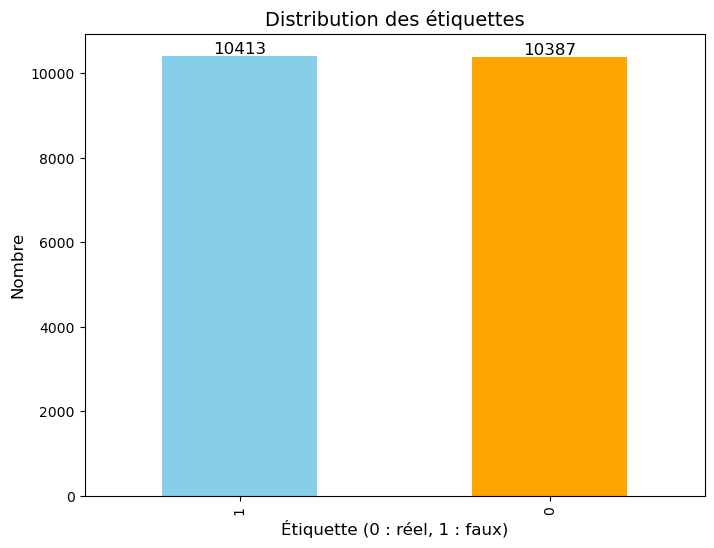

In [14]:
# Compter les occurrences de chaque étiquette
label_counts = data['label'].value_counts()

# Importer Matplotlib
import matplotlib.pyplot as plt

# Tracer la distribution
plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure
label_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution des étiquettes', fontsize=14)
plt.xlabel('Étiquette (0 : réel, 1 : faux)', fontsize=12)
plt.ylabel('Nombre', fontsize=12)

# Ajouter la valeur de chaque barre au-dessus de celle-ci
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2.,  # Position horizontale
             p.get_height() + 50,             # Position verticale (au-dessus de la barre)
             '{:.0f}'.format(p.get_height()), # Valeur à afficher
             ha='center', fontsize=12, color='black')

# Afficher le graphique
plt.show()


le graphique nous montre presque une équilibre entre les étiquettes.

Cet équilibre garantit que le modéle n'est pas biaisé en faveur d'une classe.

# Analyse de la longueur du texte

Comprendre la longueur des colonnes title et text peut révéler
des tendances entre les nouvelles fausses et vraies

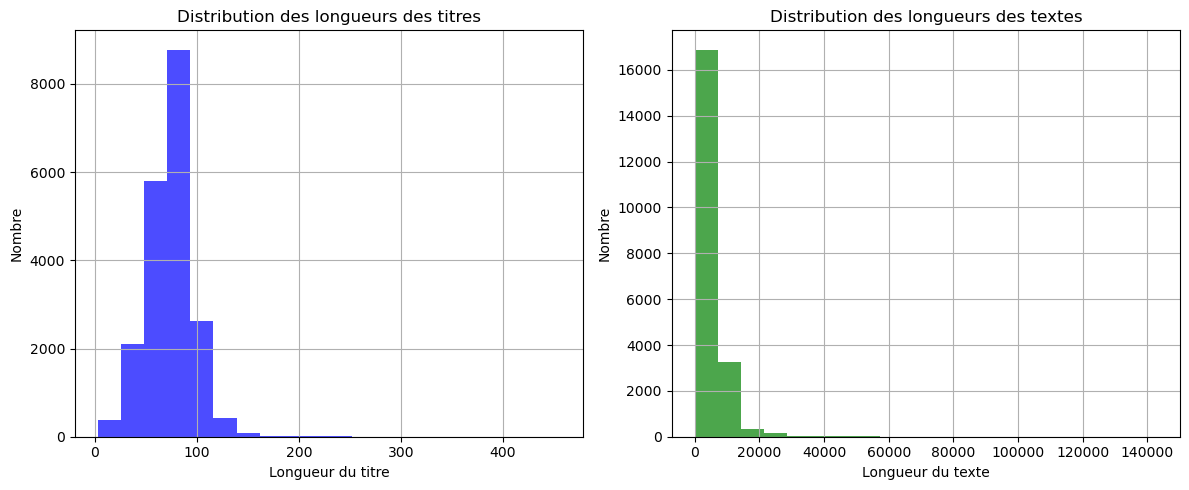

In [15]:
# Calculer les longueurs du titre et du texte
data['title_length'] = data['title'].str.len()
data['text_length'] = data['text'].str.len()

# Distribution des longueurs de titre et de texte
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution des longueurs des titres
data['title_length'].hist(ax=axes[0], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribution des longueurs des titres')
axes[0].set_xlabel('Longueur du titre')
axes[0].set_ylabel('Nombre')

# Distribution des longueurs des textes
data['text_length'].hist(ax=axes[1], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribution des longueurs des textes')
axes[1].set_xlabel('Longueur du texte')
axes[1].set_ylabel('Nombre')

# Ajuster l'affichage
plt.tight_layout()
plt.show()


- Distribution de la longueur des titres :

la plupart des titres ont des longueur concentrés et inférieur a 100 caractéres, ce qui indique des titres concis

- Distribution de la longueur de texte : 

la longueur des textes varies considérablement, la majorités d'entre eux se concentre sur moins de 20 000 caractéres. Quelque article présente des textes vraiment long, ce qui pourrait etre des valeurs abbérantes 

# Analyse de fréquence des mots

La visualisation des mots courants dans des articles réels et faux
permet d'identifier les termes distinctifs 

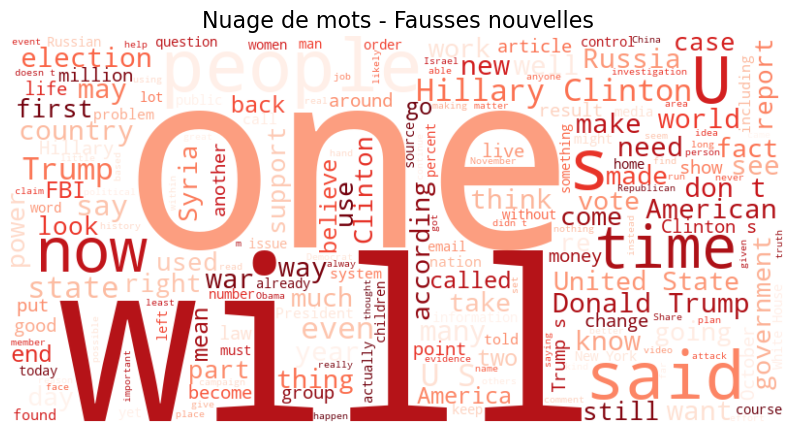

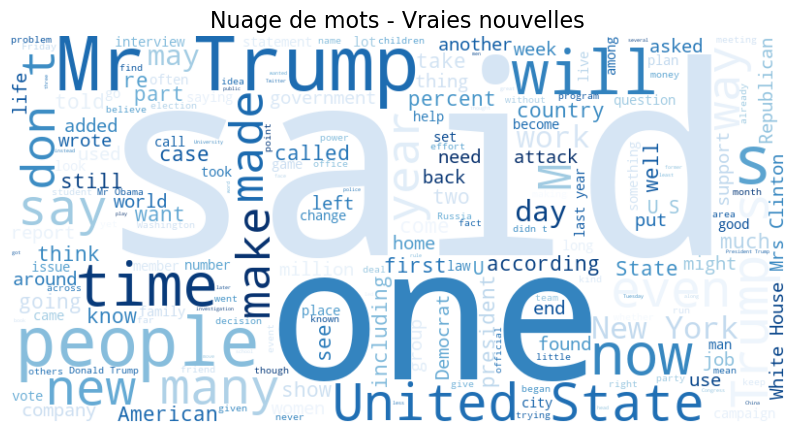

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrer les données en fonction des étiquettes
false_news = data[data['label'] == 1]['text'].dropna().str.cat(sep=' ')
true_news = data[data['label'] == 0]['text'].dropna().str.cat(sep=' ')

# Fonction pour afficher un nuage de mots
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Nuage de mots pour les fausses nouvelles
generate_wordcloud(false_news, 'Nuage de mots - Fausses nouvelles', 'Reds')

# Nuage de mots pour les vraies nouvelles
generate_wordcloud(true_news, 'Nuage de mots - Vraies nouvelles', 'Blues')


- Fausse nouvelle : des mots comme ( volonté, un, personne) dominent l'échéquier des mots 
montrant souvent les langages spéculatif et générale

- Vraie nouvelle : les mots comme ( a dit, Etats unis, Mr trump) indiquant des reportages
factuels 

# Analyse des données manquantes

In [19]:
# Compter les valeurs manquantes
missing_values = data.isnull().sum()

# Afficher les informations sur les données manquantes
print(missing_values)


title            558
author          1957
text              39
label              0
title_length     558
text_length       39
dtype: int64


# Prétraitement

Le prétraitement du est une étape éssentiellede la préparation des données textuelles
pour les modéles d'apprentissage automatique.

Gestion des valeurs manquentes

Les valeurs manquantes dans title, author et text doivent etre traitées



In [20]:
# Remplacer les valeurs manquantes dans les colonnes textuelles par des chaines vides

data['title']= data['title'].fillna('')
data['author']= data['author'].fillna('')
data['texte']= data['text'].fillna('')

Pour créer une représentation plus robuste de chaque article, nous allons combiner les titles 
colonnes author, texte en une seule fonctionnalité

In [21]:
# combiner le titre, l'auteur et le texte dans une seule colonne

data['content']= data['title']+''+data['author']+''+data['text']

 Tokenisation et mise en minuscule

la tokenisation divise les textes en mots individuels ou tokens, tandis que la mise en minuscule standarise le texte

In [23]:
from nltk.tokenize import word_tokenize

# Assurez-vous que les valeurs ne sont pas NaN avant de tokeniser
data['content'] = data['content'].fillna('').apply(lambda x: ' '.join(word_tokenize(x.lower())))


les mots vide de sens ( est, et ,le ) 

la ponctuation ne contribuent pas beaucoup a la tache de classification

In [24]:
from nltk.corpus import stopwords
import string

# Charger les mots vides (stopwords) pour l'anglais
stop_words = set(stopwords.words('english'))

# Supprimer les mots vides et la ponctuation
data['content'] = data['content'].apply(
    lambda x: ' '.join(
        [word for word in x.split() if word not in stop_words and word not in string.punctuation]
    )
)


La dérivation des racines et la lemmatisation résuisent les mots a leur forme racine, ce qui contribue a réduire la dimensionnalité des données

In [28]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Appliquer la dérivation (stemming)
data['content'] = data['content'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
)


Les modéles d'apprentissage automatique nécessitent une entrée numérique. Nous utilisons le vectoriseur TF-IDF pour transformer le texte en caractéristique

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Ajuster et transformer les données textuelles
X = tfidf_vectorizer.fit_transform(data['content'].fillna('')).toarray()  # Gestion des valeurs manquantes
Y = data['label']


# Construction du modéle et évaluation du modéle sur les données de validation

Dans cette étape, nous formons un modéle d'apprentissage automatique pour classer les articles de presse comme faux ou vrais


In [31]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle de régression logistique
model = LogisticRegression(max_iter=1000, random_state=42)


In [33]:
# Entraîner le modèle
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Faire la prédiction sur l'ensemble de validation
y_pred = model.predict(X_val)

# Calculer la précision
accuracy = accuracy_score(y_val, y_pred)
print(f"Précision : {accuracy:.2f}")

# Afficher le rapport de classification détaillé
print("\nRapport de classification :\n")
print(classification_report(y_val, y_pred))


Précision : 0.95

Rapport de classification :

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2132
           1       0.95      0.95      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



Le modéle atteint une précision de 95% pourcent ce qui indique une bonne perfomances,
nous avons un rappell et un f1_score a 95%, ce qui suggére que le modéle distingue trés bien les articles faux et vrais

# Test du modéle sur test.csv

In [38]:
import pandas as pd

# Charger les données
test_data = pd.read_csv('test.csv')

# Gérer les valeurs manquantes
test_data['title'] = test_data['title'].fillna('')  # Remplir les titres manquants
test_data['author'] = test_data['author'].fillna('')  # Remplir les auteurs manquants
test_data['text'] = test_data['text'].fillna('')  # Remplir les textes manquants

# Combiner le titre, auteur et texte en une seule colonne 'content'
test_data['content'] = test_data['title'] + ' ' + test_data['author'] + ' ' + test_data['text']

# Transformer le contenu en caractéristiques numériques avec TF-IDF
X_test = tfidf_vectorizer.transform(test_data['content']).toarray()


In [37]:
# prédire les étiquettes pour les données test

y_test_pred= model.predict(X_test)


meme si les données (test.csv) ne contient pad d'étiquettes, nous pouvons neanmoins évaluer le comportement du modéle en analysant ses prédictions

In [41]:
import numpy as np

# Vérifier la distribution des étiquettes prédites
unique, counts = np.unique(y_test_pred, return_counts=True)

# Afficher la distribution des classes prédites
print("Distribution de classe prédite : ", dict(zip(unique, counts)))


Distribution de classe prédite :  {0: 7, 1: 5193}


La distribution montre une forte biais en faveur de la classe . cela indique un surajustement du modéle ou un probléme de données

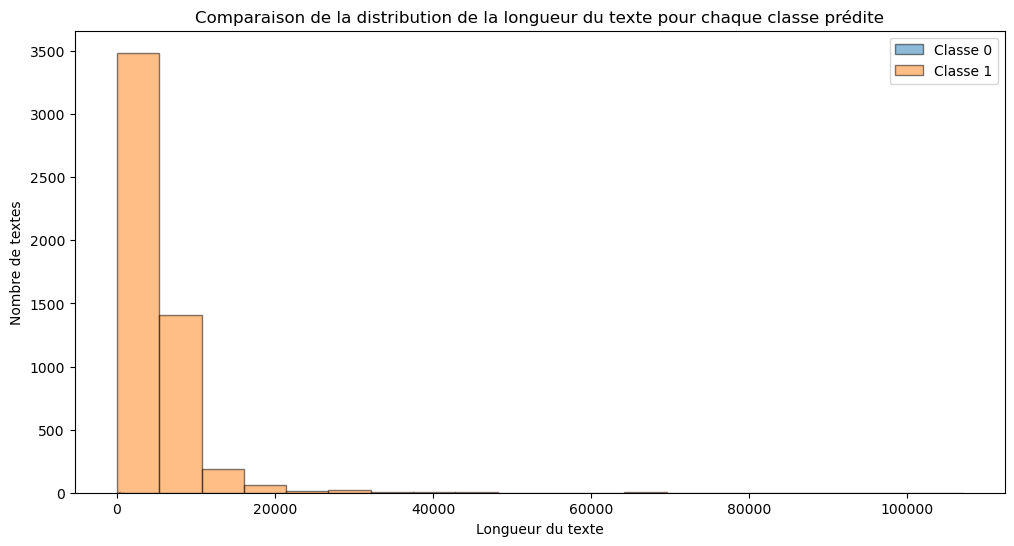

In [42]:
import matplotlib.pyplot as plt

# Ajouter une colonne de longueur de texte dans le jeu de données de test
test_data['text_length'] = test_data['text'].apply(len)

# Créer une figure pour afficher les histogrammes
plt.figure(figsize=(12, 6))

# Tracer l'histogramme de la longueur du texte pour chaque classe prédite
for label in np.unique(y_test_pred):
    # Sélectionner les indices des échantillons correspondant à cette classe
    label_indices = y_test_pred == label
    # Extraire les longueurs de texte correspondantes
    label_text_lengths = test_data.loc[label_indices, 'text_length']
    
    # Tracer l'histogramme
    plt.hist(label_text_lengths, bins=20, alpha=0.5, label=f'Classe {label}', edgecolor='black')

# Ajouter des labels et un titre
plt.title('Comparaison de la distribution de la longueur du texte pour chaque classe prédite')
plt.xlabel('Longueur du texte')
plt.ylabel('Nombre de textes')
plt.legend()

# Afficher le graphique
plt.show()


Le modèle semble biaisé en faveur de la classe majoritaire (classe 1 pour "faux"). 
Il est essentiel de prendre en compte ce déséquilibre pour améliorer les performances du modèle, 
surtout en termes de détection des classes minoritaires (classe 0).

Appercu du traitement des données invisibles

In [44]:
# Afficher les 10 premiers exemples de prédictions
num_examples = 5

# Créer un DataFrame avec le texte, l'étiquette réelle et la prédiction
examples = test_data[['title', 'author', 'text', 'content']].copy()
examples['true_label'] = y_val  # Ajouter l'étiquette réelle (si disponible)
examples['predicted_label'] = y_test_pred  # Ajouter l'étiquette prédite

# Afficher les 10 premiers exemples
for index, row in examples.head(num_examples).iterrows():
    print(f"Exemple {index + 1} :")
    print(f"Titre: {row['title']}")
    print(f"Auteur: {row['author']}")
    print(f"Texte: {row['text']}")
    print(f"Classe réelle: {row['true_label']}")
    print(f"Classe prédite: {row['predicted_label']}")
    print("-" * 50)


Exemple 1 :
Titre: Specter of Trump Loosens Tongues, if Not Purse Strings, in Silicon Valley - The New York Times
Auteur: David Streitfeld
Texte: PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported 